# Proyección del deficit de la Caja Notarial

Trabajo de proyección del deficit de la Caja Notarial a futuro, mediante la realización de una Regresión Lineal basada en los datos enviados por el propio Colegio de Escribanos según correo del 3 de febrero de 2021.

La intención es poder presentar una conclusión a futuro que permita al notariado de la Ciudad tomar una decisión razonada sobre el futuro de las prestaciones asistenciales y previsionales del Colegio de Escribanos.

#### ¿Que es una Regresión Lineal?

La Regresión Lineal es un proceso que permite determinar el grado de dependencia de las series de valores X e Y, prediciendo el valor y estimado que se obtendría para un valor x que no esté en la distribución.

En este caso contamos con los valores de X (Los años transcurridos entre 2001 y 2020), los valores de Y (Que es el deficit que ha ido acumulando la Caja Notarial a lo largo de los años) y queremos obtener el valor de Y (el futuro deficit) para los años venideros (Que es el valor x que no está en la distribución).

Para hallar los futuros valores primero debemos poder trazar una linea recta que pase lo mas cerca de cada punto de y de manera que disminuya el error. 

Para una mejor exposición voy a realizar una Regresión Lineal para predecir el deficit de los próximos 10 años.

### Carga de las librerías que usaremos para el análisis

Se procederá a cargar las librerías Python para poder hacer el análisis.

1. Numpy: Librería para matemática avanzada y manejo de matrices.
2. Pandas: Librería para el manejo de Datos en forma de Planilla tipo Excel.
3. Matplotlib: Librería para plotear gráficos.
4. Seaborn: Otra librería para plotear gráficos.
5. Sklearn: Librería de Machien Learning que contiene la función para realizar la Regresión Lineal.

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm

### Carga de los datos a utilizar

Los datos para realizar la Regresión fueron obtenidos de la página Flourish Studio donde el Colegio de Escribanos subió el siguiente gráfico de barras.

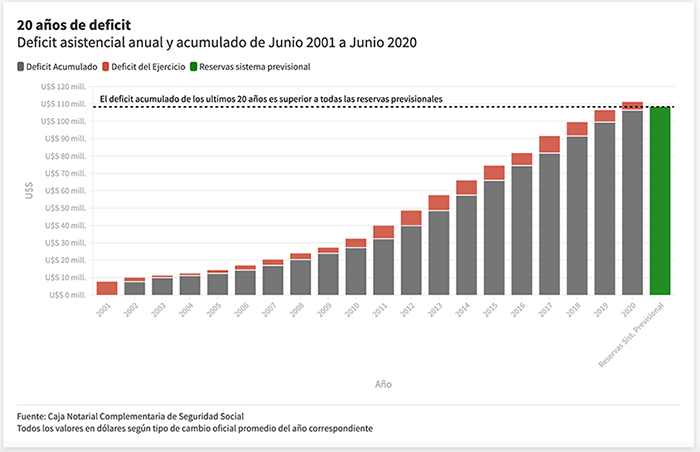

Para ello se accedió a los datos cargados en dicha página para generar el gráfico y se procedió a grabarlos en un Archivo CSV.

In [10]:
df = pd.read_csv('deficit_caja.csv', delimiter=';')
pd.set_option('float_format', '{:.2f}'.format)
df

,año,deficit_anual,deficit_acumulado
0,2001,7636197.28,0.00
1,2002,2310298.59,7636197.28
2,2003,1199750.92,9946495.87
3,2004,1220014.57,11146246.79
4,2005,1896699.51,12366261.36
5,2006,2710531.84,14262960.87
6,2007,3356632.07,16973492.71
7,2008,3620487.25,20330124.78
8,2009,3275486.34,23950612.03
9,2010,5149191.22,27226098.37


El DataFrame tiene entonces 3 columnas una por los años, una por el Deficit anual y otra por el deficit acumulado. Ahora lo que debemos hacer es separar las columnas que vamos a utilizar que son las de los años y la de Deficit acumulado, de tal manera que los años sean nuestro X y el deficit acumulado sea nuestro y.

Pero primero debemos agregar una nueva columna que muestre el acumulado total por año.

In [11]:
df['acumulado_total'] = df['deficit_anual'] + df['deficit_acumulado']
df

,año,deficit_anual,deficit_acumulado,acumulado_total
0,2001,7636197.28,0.00,7636197.28
1,2002,2310298.59,7636197.28,9946495.87
2,2003,1199750.92,9946495.87,11146246.79
3,2004,1220014.57,11146246.79,12366261.36
4,2005,1896699.51,12366261.36,14262960.87
5,2006,2710531.84,14262960.87,16973492.71
6,2007,3356632.07,16973492.71,20330124.78
7,2008,3620487.25,20330124.78,23950612.03
8,2009,3275486.34,23950612.03,27226098.37
9,2010,5149191.22,27226098.37,32375289.59


Antes de empezar a realizar la Regresión vamos a ver como se ven los importes de del Deficit Anual a lo largo del tiempo.

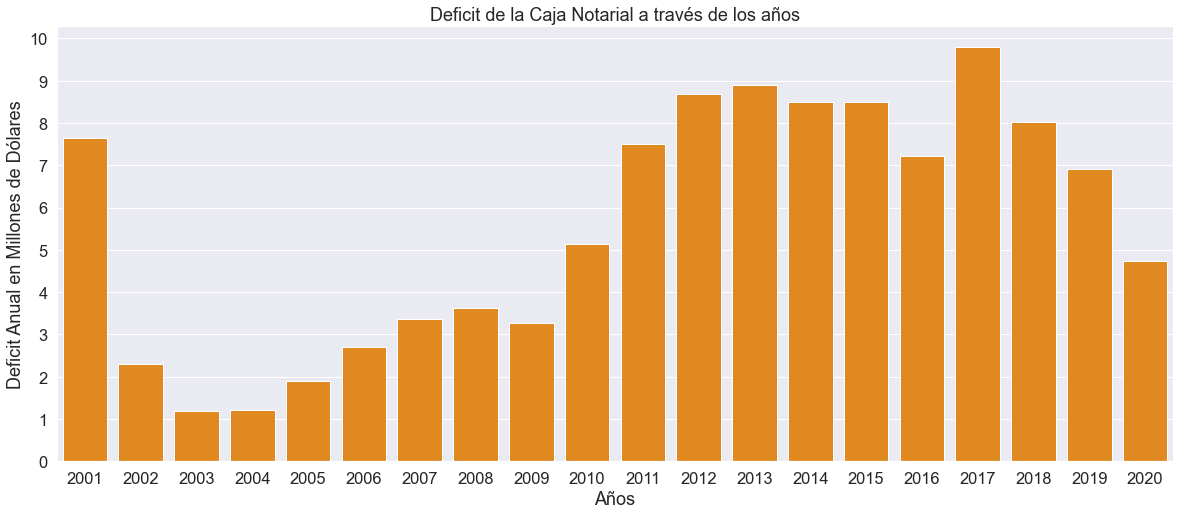

In [12]:
# Creando la base donde se va a realizar el ploteo del gráfico. 
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

# Creamos el gráfico.
ax = sns.barplot(data = df, x= 'año', y = 'deficit_anual', color = '#FF8C00', orient = 'v')

# Añadimos los títulos
plt.ylabel('Deficit Anual en Millones de Dólares')
plt.xlabel('Años')
plt.title('Deficit de la Caja Notarial a través de los años')

# Creamos los ticks que indicaran los montos del deficit.
plt.yticks(list(range(0, 11000000, 1000000)))
ax.set_yticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Mostramos el gráfico

plt.savefig('DeficitCajaAnual.png')
plt.show()

Ahora si procedemos a separar las dos columnas que vamos a usar para realizar la Regresión Líneal.

In [13]:
X = df.año.values
X

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [14]:
y = df.acumulado_total.values
y

array([7.63619728e+06, 9.94649587e+06, 1.11462468e+07, 1.23662614e+07,
       1.42629609e+07, 1.69734927e+07, 2.03301248e+07, 2.39506120e+07,
       2.72260984e+07, 3.23752896e+07, 3.98727517e+07, 4.85654003e+07,
       5.74720725e+07, 6.59665612e+07, 7.44748790e+07, 8.16968965e+07,
       9.14927580e+07, 9.95163594e+07, 1.06426372e+08, 1.11170892e+08])

Ya tenemos las dos variables separadas y ahora si podemos realizar la Regresión Lineal

Para ello vamos a iniciar el Regresor que como dije mas arriba es una función que se encuentra en la Librería Sklearn.

Una vez iniciado vamos a pasar los valors de X e y para que el Regresor pueda calcular cual es la línea que mejor atraviesa esos datos. 

In [15]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

regresor = LinearRegression()
regresor.fit(X, y)

LinearRegression()

Con la información generada podemos ahora generar un gráfico que impute los valores de deficit acumulado a lo largo de los años (los puntos azules) y la línea que mejor se adapta a esos puntos.

<Figure size 432x288 with 0 Axes>

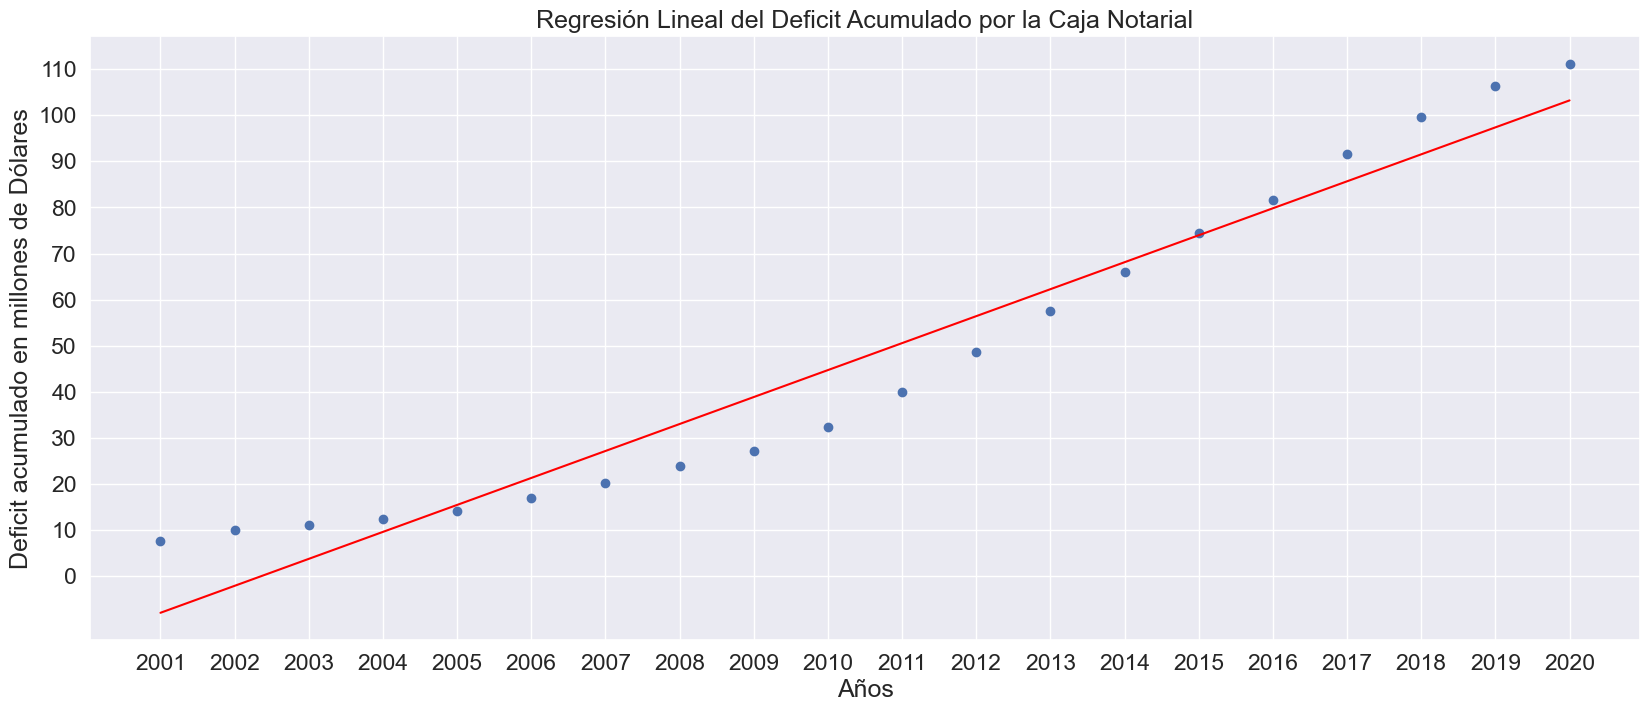

In [17]:
deficit_predecido = regresor.predict(X)

plt.clf()


fig, ax = plt.subplots(1, 1, figsize=(20, 8), dpi=100)
plt.scatter(X, y)
plt.plot(X, deficit_predecido, color='red')


plt.xlabel('Años')
plt.ylabel('Deficit acumulado en millones de Dólares')
plt.title('Regresión Lineal del Deficit Acumulado por la Caja Notarial')


plt.xticks(list(range(2001, 2021, 1)))
plt.yticks(list(range(0, 120000000, 10000000)))
ax.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
ax.set_xticklabels(list(range(2001, 2021, 1)))

plt.savefig('regresion.png')
plt.show()

### Cálculo de las pérdidas futuras.

Ahora que ya tenemos nuestro Regresor vamos a ver si podemos predecir los importes futuros del Deficit de la Caja Notarial.

Para lo cual primero vamos a crear los valores de nuevos de X. Esos valores serán desde el año 2021 al año 2030

In [18]:
nueva_X = np.arange(2021, 2031).reshape(-1, 1)
nueva_X

array([[2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030]])

Ahora vamos a predecir como se incrementaría el deficit en una década. 

In [19]:
deficit_proximos_10_años = regresor.predict(nueva_X)

In [20]:
diferencia = (y[-1] - deficit_proximos_10_años[0]) * 2
deficit_proyectado = deficit_proximos_10_años + diferencia
deficit_proyectado

array([[1.13282216e+08],
       [1.19131371e+08],
       [1.24980527e+08],
       [1.30829682e+08],
       [1.36678837e+08],
       [1.42527993e+08],
       [1.48377148e+08],
       [1.54226304e+08],
       [1.60075459e+08],
       [1.65924615e+08]])

Ahora vamos a unir estos valores con los valores anteriores para generar un nuevo DataFrame. 

Para ello vamos vamos a separar la columna de deficit total acumulado que habiamos creado anteriormente y la vamos a unir a este nuevo DataFrame.

In [21]:
index = list(range(len(nueva_X)))
nuevo_df = pd.DataFrame(data=np.column_stack((nueva_X, deficit_proyectado)),
                        columns=['año','acumulado_total'], index=index)
df_deficit_total = df[['año', 'acumulado_total']]
frames = [df_deficit_total, nuevo_df]
df_final = pd.concat(frames).reset_index(drop=True)
df_final

,año,acumulado_total
0,2001.00,7636197.28
1,2002.00,9946495.87
2,2003.00,11146246.79
3,2004.00,12366261.36
4,2005.00,14262960.87
5,2006.00,16973492.71
6,2007.00,20330124.78
7,2008.00,23950612.03
8,2009.00,27226098.37
9,2010.00,32375289.59


Finalmente vamos ahora a plotear un nuevo gráfico de barras que muestre el deficit acumulado y proyectado.

<Figure size 432x288 with 0 Axes>

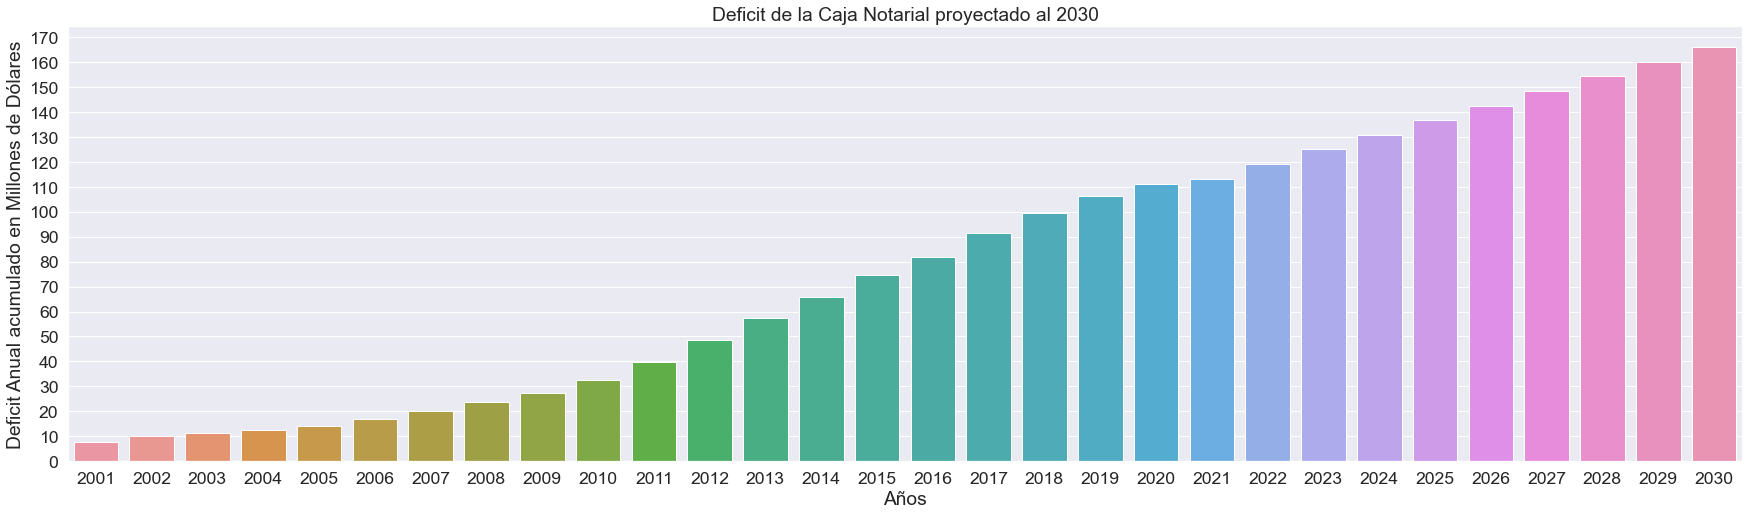

In [22]:
plt.clf()

# Creando la base donde se va a realizar el ploteo del gráfico. 
plt.figure(figsize=[30, 8])
sns.set_style('whitegrid')
sns.set(font_scale=1.6)
sns.color_palette("flare", as_cmap=True)

# Creamos el gráfico.
ax = sns.barplot(data = df_final, x= 'año', y = 'acumulado_total', orient = 'v')

# Añadimos los títulos
plt.ylabel('Deficit Anual acumulado en Millones de Dólares')
plt.xlabel('Años')
plt.title('Deficit de la Caja Notarial proyectado al 2030')

# Creamos los ticks que indicaran los montos del deficit.
plt.yticks(list(range(0, 180000000, 10000000)))
ax.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170])
ax.set_xticklabels(list(range(2001, 2031)))

# Mostramos el gráfico
plt.savefig('grafico_barras.png')
plt.show()


El resultado final es preocupante. Si no se toman medidas urgentes y drásticas el déficit acumulado alcanzará los USD 165 millones para el año 2030

Espero que este informe sirva al notariado para poder tomar una decisión que pueda sanear las cuentas de la Caja Notarial.